## Import Libraries 

In [1]:
# import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy.stats as stat
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#### Load data

In [2]:
data_frame = pd.read_csv("adsmart.csv") # load data

#### Drop observations where users didn't respond to the questionaire

In [3]:
drop_mask = data_frame.query('yes==0 and no==0') # drop columns where yes and no are both 0
data_frame=data_frame.drop(drop_mask.index)

In [4]:
data_frame.head()


,id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,7/5/2020,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,7/4/2020,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,7/6/2020,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,7/8/2020,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,1


In [5]:
data_frame.isna().sum()

id             0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

### Function for creating an awareness column

In [6]:
# crate an awareness column to the dataframe
def label_awareness (row):
    if row['yes'] == 1 :
         return '1'
    if row['no'] == 1 :
        return '0'
def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

#     print('RMSE Score: {}'.format(rmse),end=', ')
#     print('R2_Squared: {}'.format(r_sq),end=', ')
#     print('MAE Score: {}'.format(mae))
    return mae
def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(13,8))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    plt.grid()
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

In [7]:
data_frame['awareness'] = data_frame.apply (lambda row: label_awareness(row), axis=1) # apply awareness to each row
data_frame.head()

,id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,7/5/2020,2,E5823,6,Chrome Mobile WebView,0,1,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,7/4/2020,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,7/6/2020,8,Generic Smartphone,6,Chrome Mobile,0,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,7/8/2020,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,7/3/2020,15,Generic Smartphone,6,Chrome Mobile,0,1,0


### Split the dataset to training(90%) and test(10%)
The training set will be further divided to training and validation

In [8]:
# split the dataset to training and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

data_x = data_frame.loc[:, data_frame.columns != 'awareness']
data_y = data_frame['awareness']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=1 - train_ratio)
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


### Change categorical variables to numerical value

In [9]:
from sklearn.preprocessing import LabelEncoder
# change categorical variables to numerical value
lb = LabelEncoder()
x_train['experiment'] = lb.fit_transform(x_train['experiment'])
x_test['experiment'] = lb.fit_transform(x_test['experiment'])
x_train['browser'] = lb.fit_transform(x_train['browser'])
x_test['browser'] = lb.fit_transform(x_test['browser'])
x_train['device_make'] = lb.fit_transform(x_train['device_make'])
x_test['device_make'] = lb.fit_transform(x_test['device_make'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

# Logistic Regression

### Custom Logistic Regression model with p-value calculation capability

In [10]:
# custom logistic regression with p-value
class LogisticReg:
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) 
        Cramer_Rao = np.linalg.inv(F_ij) 
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates 
        p_values = [stat.norm.sf(abs(x)) for x in z_scores]
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij
        return self.model,p_values

### Create five folds and split each fold to validation and training with a proportion of 20%,80% respectively. Each fold uses a different solver parameter to find out which one works best.

In [11]:
from sklearn.preprocessing import MinMaxScaler
# create 5 folds
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

solver_params=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_avg_score = 0
best_solver = ''
p_value=[]
best_model = None
fold_num=1
for solver in solver_params:
    scores=[]
    randomIter = kf.split(x_train)
    i=0
    while i<5:
        train_idx, validation_idx = next(randomIter)
        x_validation = x_train.iloc[validation_idx]
        x_training = x_train.iloc[train_idx]
        y_validation = y_train.iloc[validation_idx]
        y_training = y_train.iloc[train_idx]
        x_training_refined = x_training.drop(columns=['id','yes','no','date'], axis=1)
        x_validation_refined = x_validation.drop(columns=['id','yes','no','date'], axis=1)
        
        scaling = MinMaxScaler()
        
        x_training_refined[:5] = scaling.fit_transform(x_training_refined[:5])
        
        #print(x_training_refined)
        log_model = LogisticRegression()
        log_model.fit(x_training_refined,y_training)
        log_clf = LogisticReg(solver=solver )
        log_clf,p_values = log_clf.fit(x_training_refined,y_training)
        y_preds = log_clf.predict(x_validation_refined)
        score =metrics.accuracy_score(y_validation, y_preds)
        #core = calculate_metrics(y_validation, y_preds)
        scores.append(score)
        i+=1
    avg = sum(scores)/len(scores)
    print('Fold',fold_num,'average',avg)
    if(avg>best_avg_score):
        best_avg_score = avg
        best_solver = solver
        best_model = log_clf
        p_value=p_values
    fold_num+=1
print('Best score: ' , best_solver,'--->', best_avg_score)




Fold 1 average 0.5482433442585245
Fold 2 average 0.5482433442585245
Fold 3 average 0.5364556379736645
Fold 4 average 0.5386061756080731


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Fold 5 average 0.5407337128399747
Best score:  newton-cg ---> 0.5482433442585245


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## As we can observe from the above cell, the best parameters for the logistic regression model were found on fold 2. Fold 2 used the lbfgs solver. This is the model to be used in the following cell.

### Plot p-values and compare it to significance level of 0.05  to check statistical significance of each cooficient

,Feature,Coffecient,p_value
0,Experiment,0.128383,0.328274
2,Device Make,0.002141,0.307705
4,Browser,-0.038058,0.257070
3,Platform Os,0.067660,0.059232
1,Hour,0.023801,0.041269


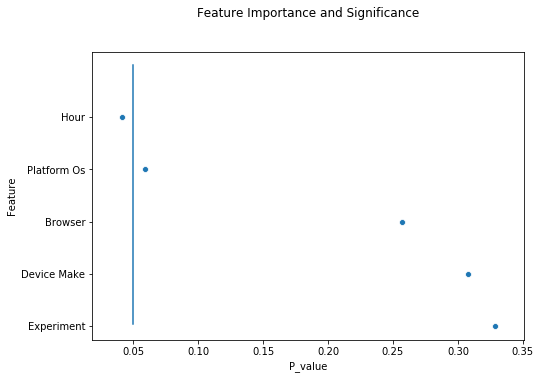

In [12]:
df_pvalue = pd.DataFrame(p_values).reset_index().rename(columns={'index':'Terms', 0:'p_value'})
df_pvalue['Feature']=['Experiment','Hour','Device Make','Platform Os','Browser']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
df_pvalue['Coffecient']=list(best_model.coef_[0])
df_pvalue= df_pvalue.sort_values('p_value',ascending=False)
#df_pvalue['coff'] = best_model.coef_
ax = sns.scatterplot(x='p_value', y='Feature', data=df_pvalue)
plt.plot([0.05,0.05], [0.05,5])
plt.title('Feature Importance and Significance', y=1.1)
plt.ylabel('Feature')
plt.xlabel('P_value')

df_pvalue[['Feature','Coffecient','p_value']]

## As we can observe from the above cell, platform_os is the only feature with a p_value less than 0.05. The coefficient of platform os is 0.0486 which shows its level of negative impact on determining the awareness level of users.

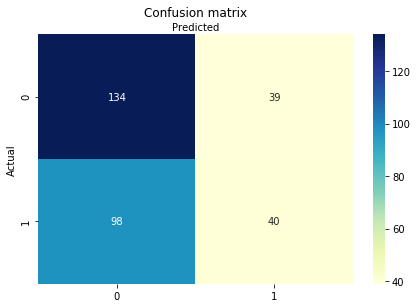

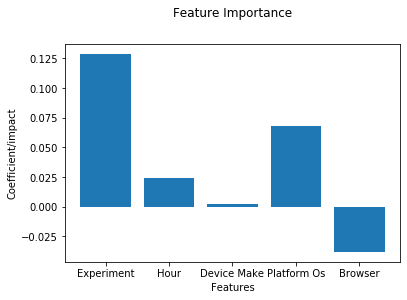

311 311


<Figure size 432x288 with 0 Axes>

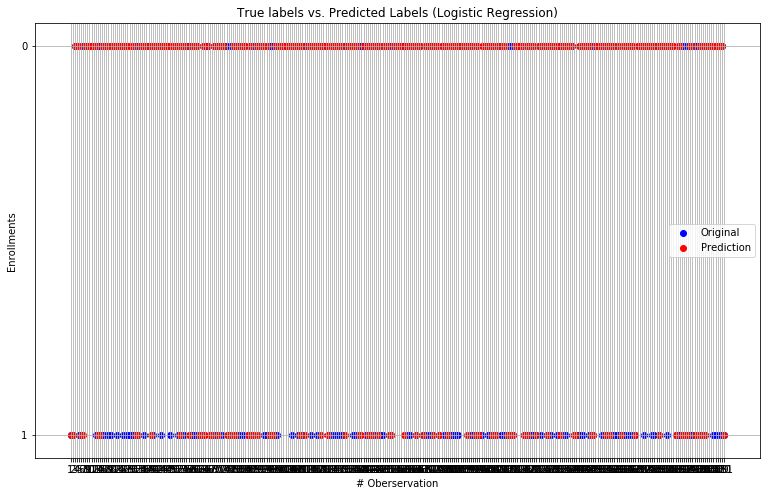

In [13]:
x_test_refined = x_test.drop(columns=['id','yes','no','date'], axis=1)
y_preds = best_model.predict(x_test_refined.astype(float))

cnf_matrix = metrics.confusion_matrix(y_test, y_preds)
ax=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
importance = best_model.coef_[0]
# #summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure()
plt.title('Feature Importance', y=1.1)
plt.ylabel('Coefficient/impact')
plt.xlabel('Features')
plt.bar(['Experiment','Hour','Device Make','Platform Os','Browser'], importance)
plt.show()
plt.figure()
x_test_refined = x_test.drop(columns=['id','yes','no','date'], axis=1)
y_preds = best_model.predict(x_test_refined.astype(float))
print(len(y_test.values),len(y_preds))
plot_preds(y_test.values, y_preds, 'Logistic Regression')



## The above confusion matrix shows the model is barely accurate.

# Dicision Tree Classifier

### Create five folds and split each fold to validation and training with a proportion of 20%,80% respectively. Each fold uses a different set of parameters to find out which one works best.

In [14]:
# create 5 folds
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

params=[{'max_depth':3,'min_samples_split':2},{'max_depth':3,'min_samples_split':2},{'max_depth':3,'min_samples_split':2},
               {'max_depth':3,'min_samples_split':2},{'max_depth':3,'min_samples_split':2}]
best_avg_score = 0
best_solver = ''
best_model = None
fold_num=1
for param in params:
    scores=[]
    randomIter = kf.split(x_train)
    i=0
    while i<5:
        train_idx, validation_idx = next(randomIter)
        x_validation = x_train.iloc[validation_idx]
        x_training = x_train.iloc[train_idx]
        y_validation = y_train.iloc[validation_idx]
        y_training = y_train.iloc[train_idx]
        x_training_refined = x_training.drop(columns=['id','yes','no','date'], axis=1)
        x_validation_refined = x_validation.drop(columns=['id','yes','no','date'], axis=1)
        clf = DecisionTreeClassifier(**param)
        clf = clf.fit(x_training_refined.astype(float),y_training.astype(float))
        y_preds = clf.predict(x_validation_refined)
        score = calculate_metrics(y_validation, y_preds)
        scores.append(score)
        i+=1
    avg = sum(scores)/len(scores)
    print('Fold',fold_num,'average',avg)
    if(avg>best_avg_score):
        best_avg_score = avg
        best_solver = param
        best_model = clf
    
    fold_num+=1
print('Best score: ' , best_solver,'--->', best_avg_score)


Fold 1 average 0.4517854062446093
Fold 2 average 0.4517854062446093
Fold 3 average 0.4517854062446093
Fold 4 average 0.4517854062446093
Fold 5 average 0.4517854062446093
Best score:  {'max_depth': 3, 'min_samples_split': 2} ---> 0.4517854062446093


## As we can observe from the above cell the model performed the same regardless of the parameters we have given it. The last model is going to be used in the following cell

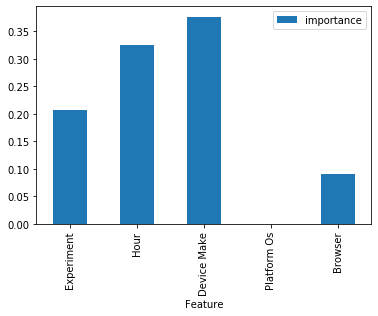

In [15]:
best_model.feature_importances_
df_importance = pd.DataFrame({'importance': clf.feature_importances_})
df_importance['Feature']=['Experiment','Hour','Device Make','Platform Os','Browser']
df_importance = df_importance.set_index('Feature')
df_importance.plot(kind='bar')

## The decision tree model believes the device_make feature is the most important

## Visualizing the decision tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


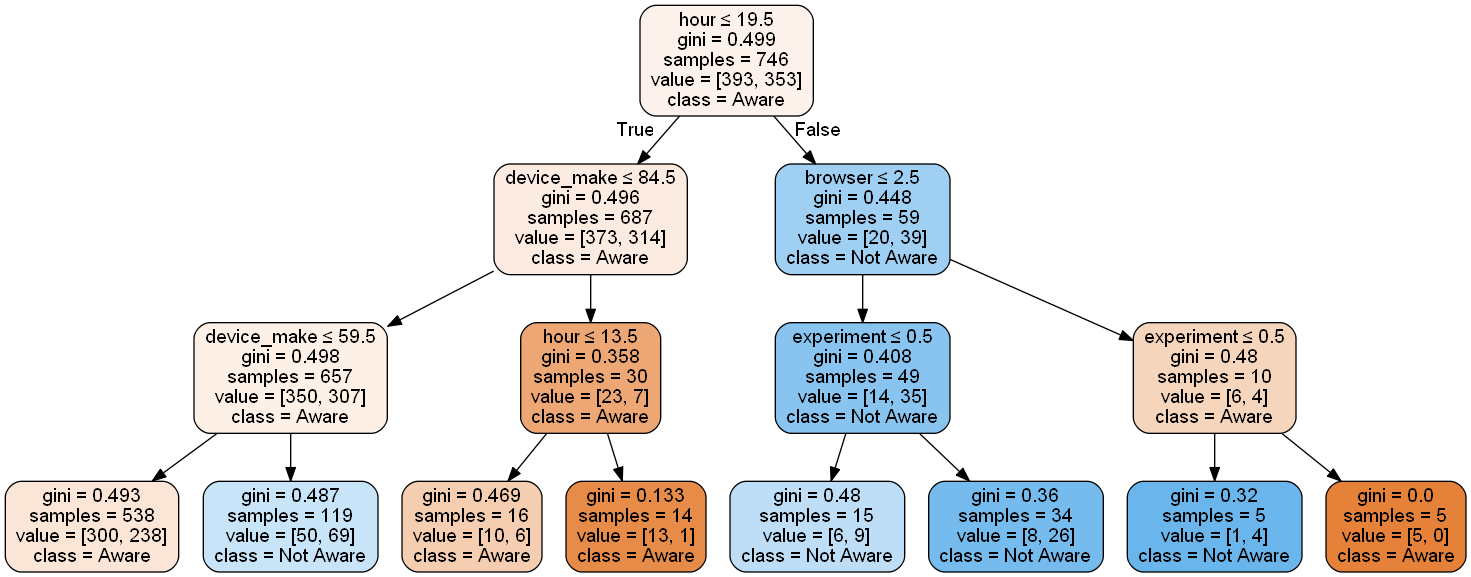

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
from sklearn import tree
# export_graphviz(best_model, out_file=dot_data, 
#                 feature_names=x_training_refined.columns,
#                 filled=True, rounded=True,
#                 special_characters=True)
dot_data = tree.export_graphviz(best_model, out_file="resume.dot",
feature_names=list(x_test_refined),class_names=['Aware','Not Aware'],
filled=True, rounded=True, special_characters=True, leaves_parallel=False)
graph = pydotplus.graphviz.graph_from_dot_file("resume.dot")
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## The above plot visualizes the dicisions made by the model. It is visible that if hour> 19.5 ( late in to the night ), people's level of awareness decreases.

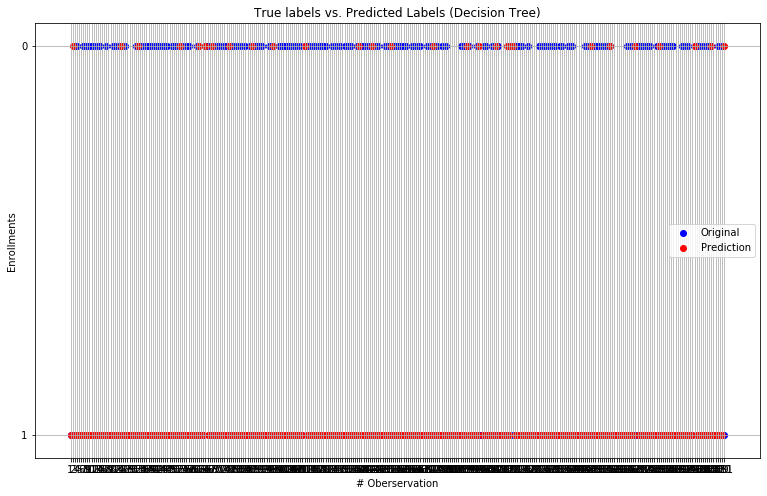

In [17]:
x_test_refined = x_test.drop(columns=['id','yes','no','date'], axis=1)
y_preds = best_model.predict(x_test_refined.astype(float))
plot_preds(y_test.values, y_preds, 'Decision Tree')

# XG Boost

### Create five folds and split each fold to validation and training with a proportion of 20%,80% respectively. Each fold uses a different set of parameters to find out which one works best.

In [18]:
from xgboost import XGBClassifier
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

params=[{'random_state':1,'learning_rate':0.02},{'random_state':2,'learning_rate':0.01},{'random_state':3,'learning_rate':0.02},
       {'random_state':3,'learning_rate':0.05},{'random_state':2,'learning_rate':0.02}]
best_avg_score = 0
best_solver = ''
best_model = None
fold_num=1
for param in params:
    scores=[]
    randomIter = kf.split(x_train)
    i=0
    while i<5:
        train_idx, validation_idx = next(randomIter)
        x_validation = x_train.iloc[validation_idx]
        x_training = x_train.iloc[train_idx]
        y_validation = y_train.iloc[validation_idx]
        y_training = y_train.iloc[train_idx]
        x_training_refined = x_training.drop(columns=['id','yes','no','date'], axis=1)
        x_validation_refined = x_validation.drop(columns=['id','yes','no','date'], axis=1)
        
        sc = StandardScaler()
        x_training = sc.fit_transform(x_training_refined)
        x_validation = sc.fit_transform(x_validation_refined)
        clf = XGBClassifier(**param)
        clf = clf.fit(x_training_refined.astype(float),y_training.astype(float))
        y_preds = clf.predict(x_validation_refined)
        accuracy = accuracy_score(y_validation.astype(float), y_preds)
        scores.append(accuracy)
        i+=1
    avg = sum(scores)/len(scores)
    print('Fold',fold_num,'average',avg)
    if(avg>best_avg_score):
        best_avg_score = avg
        best_solver = param
        best_model = clf
    fold_num+=1
print('Best score: ' , best_solver,'--->', best_avg_score)



Fold 1 average 0.542867000172503
Fold 2 average 0.5374906560864815
Fold 3 average 0.542867000172503
Fold 4 average 0.5374964061871083
Fold 5 average 0.542867000172503
Best score:  {'random_state': 1, 'learning_rate': 0.02} ---> 0.542867000172503


## As we can see from above cell, the 5th fold with random state of 1 and learning rate of 0.02 is the best performer

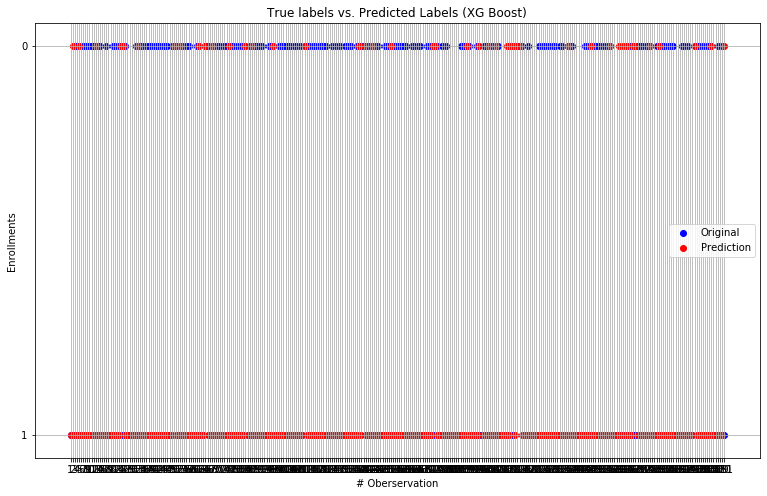

In [19]:
x_test_refined = x_test.drop(columns=['id','yes','no','date'], axis=1)
y_preds = best_model.predict(x_test_refined.astype(float))

plot_preds(y_test.values, y_preds, 'XG Boost')


## Decision tree also predicts device_make is the most important feature.

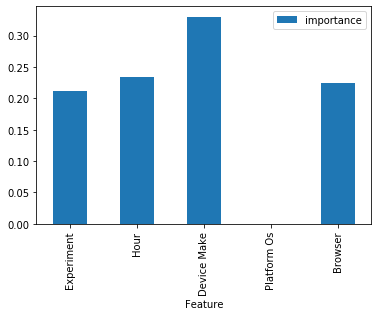

In [20]:
best_model.feature_importances_
df_importance = pd.DataFrame({'importance': clf.feature_importances_})
df_importance['Feature']=['Experiment','Hour','Device Make','Platform Os','Browser']
df_importance = df_importance.set_index('Feature')
df_importance.plot(kind='bar')

## Which data features are relevant to predicting the target variable?
* As shown in the above plot all features except platform os are relevant.

##  Explain what the difference is between using A/B testing to test a hypothesis vs using Machine learning to learn the viability of the same effect?
* Unlike statistical inference, Machine Learning algorithms enable us to model complex systems that include all of the ongoing events, user features, and more. 
* An attractive benefit to Machine Learning is that we can combine multiple approaches to gain insights.

## Explain the purpose of training using k-fold cross validation instead of using the whole data to train the ML models?

* Cross-validation is a technique to evaluate predictive models by dividing the original sample into a training set to train the model, and a validation set to evaluate it.
* I tried changing different parameters of each model for each fold to find out which model is performing better.

## What information do you gain using the Machine Learning approach that you couldn’t obtain using A/B testing?

* Understanding the Complex System - We discovered that the system is impacted by hours in logistic regression.
* Magnitude and direction of impact- We discovered the impact each features had on the awareness of the users and wether it is positive or not